In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectKBest, chi2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

## Feature_Selection(2)
- 상관계수, 거리기반 KMeans 피처를 추가해서 대체하는 방식으로 진행

- 통계치를 통해서 피처를 선정하는 방법
- VarianceThreshold : 지정된 분산이 데이터셋은 제거하는 경우
- chi2: 범주형 타겟변수와 범주형 특성 간의 독립성 테스트를 통해 피처 선정하는 경우
- f_classifi ANOVA : F-value 계산으로 연속형, 범주형 타겟 피처 선정
- mutual_info_classif(regresison도 가능): 뮤튜얼 정보 계산해서 범주형 타겟변수와 연속형 변수 또는 이산형 간의 평가 후 피처 선정
- f_regression: F-value 회귀 계산하여 연속형 특성 변수간의 관계 계산 피처 선정

- ## 1. "VarianceThreshold" :
- 분산의 임계값, 임계값은 기준은 데이터셋에 따라 다르고, 도메인에 따라 다르기 때문에 적정하게 비교해 보면서 진행하면 된다.

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.fillna(titanic.mean(), inplace=True) # 결측값  평균으로 대체

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_35099/528841823.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.fillna(titanic.mean(), inplace=True) # 결측값  평균으로 대체


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic = pd.get_dummies(titanic, columns =['sex','class','embark_town','deck','embarked'],drop_first=True)

selected_features 선택된 피처  Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'class_Second',
       'class_Third', 'embark_town_Southampton', 'embarked_S'],
      dtype='object')


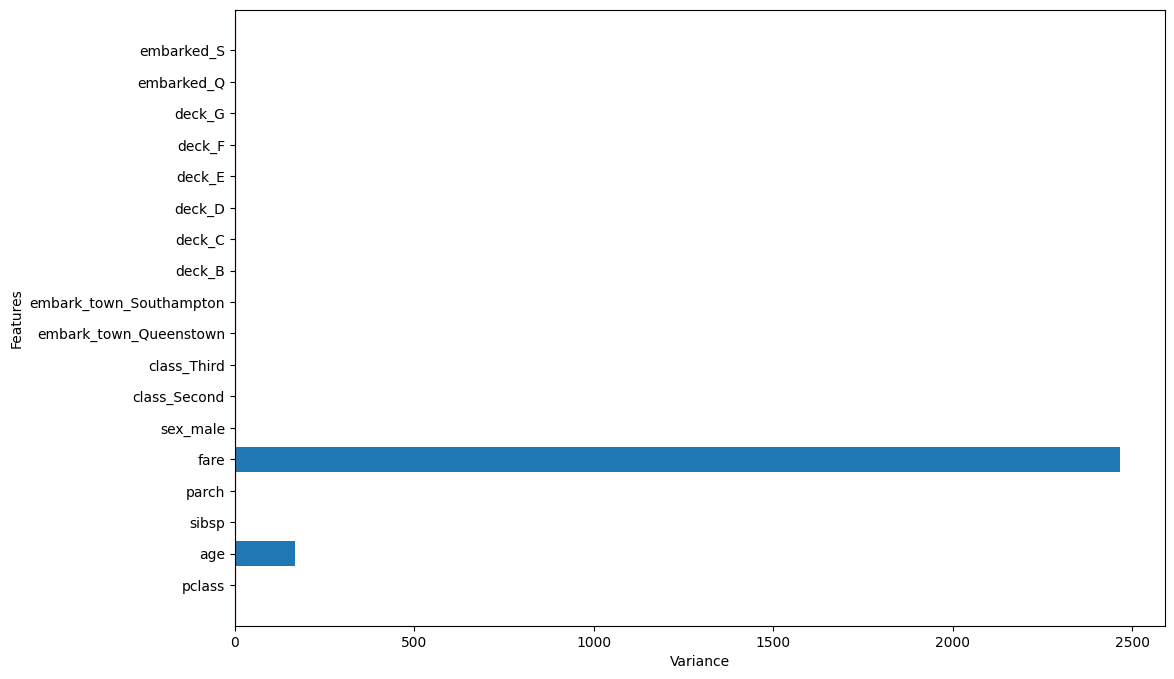

In [ ]:
#피처 정리
X=titanic.drop(['survived','alive','who','adult_male','alone'],axis =1)
y= titanic['survived']


#VarianceThreshold

#임계값 중요하다.
threshold =0.1
selector = VarianceThreshold(threshold)
X_reduced = selector.fit_transform(X)

# 선택된 특성을 확인하기
selected_features=X.columns[selector.get_support(indices=True)]
print('selected_features 선택된 피처 ',selected_features)

#시각화로 간단하게 살펴보기

plt.figure(figsize=(12,8))
plt.barh(width= selector.variances_, y=X.columns)
plt.xlabel('Variance')
plt.ylabel('Features')
plt.axvline(x=threshold, color='r', label = 'threshold')

- 피처 셀렉션을 통한 해석은 어떤 식으로 바라봐야 할까?
- fare, age -> 분산이 높다. 해당 피처는 다양한 값을 가질 수 있다. 다양한 데이터를 상대적으로 다른 피처보다 담고 있다.
- 유용한 정보를 더 담고 있을 확률이 높다.

- 분산도가 높다면 -> 피처가 모델의 중요한 영향을 미칠수도 있다.
- 분산이 높다라면 -> 분산을 잘 손실없이 가공하는 것도 중요하겠다.

In [ ]:
selector.variances_

array([6.98230591e-01, 1.68862667e+02, 1.21467827e+00, 6.48999031e-01,
       2.46666531e+03, 2.28218083e-01, 1.63863350e-01, 2.47392241e-01,
       7.89513794e-02, 2.00367561e-01, 4.99671865e-02, 6.18329447e-02,
       3.56652949e-02, 3.46248367e-02, 1.43774697e-02, 4.46918367e-03,
       7.89513794e-02, 2.00367561e-01])

In [ ]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'class_Second',
       'class_Third', 'embark_town_Queenstown', 'embark_town_Southampton',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [ ]:
selector.get_support

<bound method SelectorMixin.get_support of VarianceThreshold(threshold=0.1)>

In [ ]:
selector

VarianceThreshold(threshold=0.1)

In [ ]:
X_reduced

array([[ 3.        , 22.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

## 2. SelectKBest, chi2:
- 카이제곱 값을 계산하여서 특성 추출하게 된다.
---
- 특성과 타겟간의 독립성을 검정하는 통계적인 방법
- 범주형 특성, 범주형 타겟 간의 연관성 측정
---
- 어떤 식으로 계산하는가?
- 기대빈도 계산하여서
- 빈도테이블을 이용해서 계산한다.
- 카이제곱의 임계값보다 크다면 특성과 타겟 변수 사이에 통계적으로 유의미한 관계가 있음을 나타낸다.

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
import numpy as np
#결측치 처리
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['class'] = label_encoder.fit_transform(titanic['class'])

# 연속형 데이터를 범주형 데이터로 변환
disc=KBinsDiscretizer(n_bins =5, encode = 'ordinal', strategy='uniform')
titanic['age']=disc.fit_transform(np.array(titanic['age']).reshape(-1,1))
titanic['fare']=disc.fit_transform(np.array(titanic['fare']).reshape(-1,1))

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [ ]:
X = titanic[['pclass','sex','age','sibsp','parch','fare','embarked']]
y = titanic['survived']

In [ ]:
# 카이제곱 적용
# 데이터셋 학습
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x7fa70da49af0>)

<BarContainer object of 7 artists>

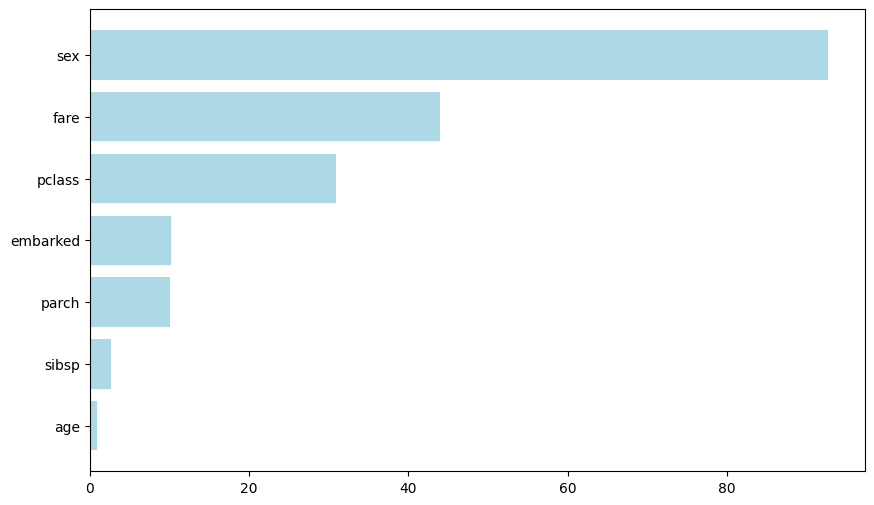

In [ ]:
# 카이제곱 점수 시각화

chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightblue')

- 해당 피처의 카이제곱 값에 대한 결과 해석은 어떻게 해야 할까?
- 두 범주형 변수 간의 독립성 테스트, 두 변수간의 관계가 순수한 우연에 의한 것인지 아니면 통계적으로 유의미한 관계가 있는지 평가하는 것
- 카이제곱 값이 높다-> 두 변수 사이에 상관관계가 높을 가능성이 있다.

In [ ]:
chi_scores

,Feature,Score
1,sex,92.702447
5,fare,44.013942
0,pclass,30.873699
6,embarked,10.202525
4,parch,10.097499
3,sibsp,2.581865
2,age,0.873570


In [ ]:
chi_selector.scores_

array([30.87369944, 92.70244698,  0.87357017,  2.58186538, 10.09749911,
       44.01394153, 10.20252466])

## 3.뮤투얼 정보를 이용한 특성 선택
- Mutual Information (MI) : 상호 의존성을 측정하는 것
- 엔트로피 지수 가지고 계산하는 것
- 엔트로피(Entropy) - 하나의 피처가 가질 수 있는 정보양 계산
- 조건부 엔트로피(Conditional Entropy)
- MI = H(Y) - H(Y|X)

- 계산된 결과가 (정보값) 타겟 변수와 특성이 얼마나 강력한 관계가 있는가 보여준다. 높은 특성은 타겟 변수에 대해서 더 많은 정보를 제공한다.
- 값이 높을수록 Y값 관계에서 더 많은 정보를 제공하니 영향이 있다.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.dropna(subset=['age','embarked','deck'],inplace=True)


#범주형 데이터를 수치형으로 변환하고 인코딩 진행
label_encoder=LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['class'] = label_encoder.fit_transform(titanic['class'])
titanic['deck'] = label_encoder.fit_transform(titanic['deck'])


#학습 데이터셋 정리

X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class','deck']]

y = titanic['survived']

In [ ]:
# 뮤추얼정보 계산

mi_scores = mutual_info_classif(X,y, discrete_features='auto', random_state=111)

<BarContainer object of 9 artists>

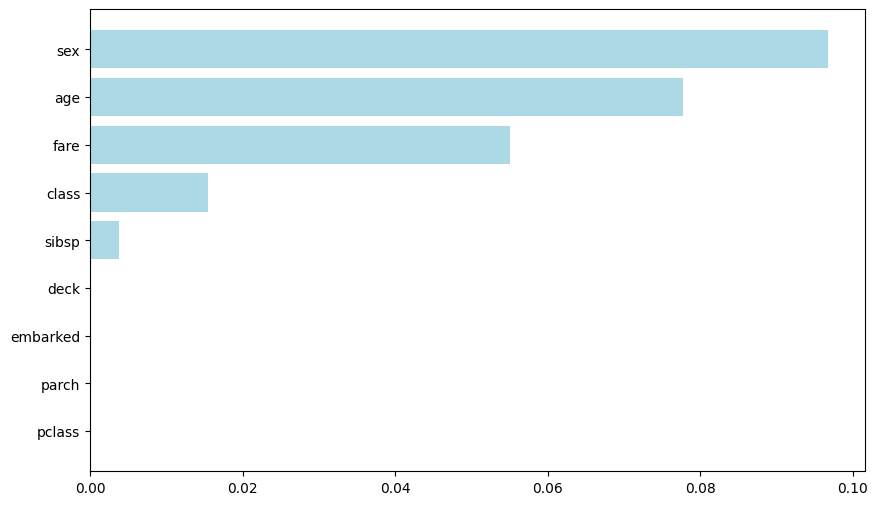

In [ ]:
# 뮤튜얼정보시각화

mi_scores_df = pd.DataFrame({'Features':X.columns , 'MI Scores':mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=True)


# 시각화 진행
plt.figure(figsize=(10,6))
plt.barh(mi_scores_df['Features'], mi_scores_df['MI Scores'], color='lightblue')